In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import sklearn
from sklearn.preprocessing import *
from sklearn.preprocessing import QuantileTransformer

In [2]:
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
# date 에서 연도 칼럼, 월 칼럼, 일 칼럼 따로 분리 
def seperate_date(df):
    date=list(df['Date'])
    year=[]
    month=[]
    day=[]
    year_=''
    month_=''
    day_=''
    wday=1
    for j in date:
        list_=j.split("/")
        for i in range(3):
            if(i==0):
                day_+=list_[i]
            elif(i==1):
                month_+=list_[i]
            elif(i==2):
                year_+=list_[i]
        year.append(int(year_))
        month.append(int(month_))
        day.append(int(day_))
        year_=''
        month_=''
        day_=''
    df=df.drop(columns='Date')
    df['year']=year
    df['month']=month
    df['day']=day
    return df

In [4]:

train=seperate_date(train)
train = train.fillna(0)

draw= train
        

In [5]:
'''
list1=train[(train['Promotion1']==0.0)&(train['year']>2011)].index
for i in list1:
    train.at[i,'Promotion1']=train['Promotion1'].mean()
    
list2=train[(train['Promotion2']==0.0)&(train['year']>2011)].index
for i in list2:
    train.at[i,'Promotion2']=train['Promotion2'].mean()
    
list3=train[(train['Promotion3']==0.0)&(train['year']>2011)].index
for i in list3:
    train.at[i,'Promotion3']=train['Promotion3'].mean()
    
    
list4=train[(train['Promotion4']==0.0)&(train['year']>2011)].index
for i in list4:
    train.at[i,'Promotion4']=train['Promotion4'].mean()
    
list5=train[(train['Promotion5']==0.0)&(train['year']>2011)].index
for i in list5:
    train.at[i,'Promotion5']=train['Promotion5'].mean()
'''

"\nlist1=train[(train['Promotion1']==0.0)&(train['year']>2011)].index\nfor i in list1:\n    train.at[i,'Promotion1']=train['Promotion1'].mean()\n    \nlist2=train[(train['Promotion2']==0.0)&(train['year']>2011)].index\nfor i in list2:\n    train.at[i,'Promotion2']=train['Promotion2'].mean()\n    \nlist3=train[(train['Promotion3']==0.0)&(train['year']>2011)].index\nfor i in list3:\n    train.at[i,'Promotion3']=train['Promotion3'].mean()\n    \n    \nlist4=train[(train['Promotion4']==0.0)&(train['year']>2011)].index\nfor i in list4:\n    train.at[i,'Promotion4']=train['Promotion4'].mean()\n    \nlist5=train[(train['Promotion5']==0.0)&(train['year']>2011)].index\nfor i in list5:\n    train.at[i,'Promotion5']=train['Promotion5'].mean()\n"

In [6]:

train["Weekly_Sales"] = np.log1p(train["Weekly_Sales"])
train["IsHoliday"] = train["IsHoliday"].astype(int)

train=train.fillna(0)

In [7]:

train = pd.get_dummies(data = train,columns = ['Store'])
train=train.drop(columns=['id'])
train
#지점이 낮을때 값이 올라가는데 낮은 지점의 특징을 알아보자 그리고 프로모션도 알아보자

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,0,14.312455,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,1,14.311400,...,0,0,0,0,0,0,0,0,0,0
2,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,0,14.292967,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,0,14.158908,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,0,14.256862,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,0,13.506671,...,0,0,0,0,0,0,0,0,0,1
6251,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,1,13.549608,...,0,0,0,0,0,0,0,0,0,1
6252,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,0,13.462029,...,0,0,0,0,0,0,0,0,0,1
6253,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,0,13.491285,...,0,0,0,0,0,0,0,0,0,1


In [8]:
test=seperate_date(test)
test = test.fillna(0)
test["IsHoliday"] = test["IsHoliday"].astype(int)
test = pd.get_dummies(data = test,columns = ['Store'])
test=test.drop(columns=['id'])

test

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,year,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
1,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
2,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
3,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,0,2012,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,0,2012,...,0,0,0,0,0,0,0,0,1,0
176,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,0,2012,...,0,0,0,0,0,0,0,0,0,1
177,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,0,2012,...,0,0,0,0,0,0,0,0,0,1
178,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,0,2012,...,0,0,0,0,0,0,0,0,0,1


In [9]:
#df_temp =train
#sns.pairplot(data=df_temp, diag_kind='hist')
#plt.show()

#train=train.drop("IsHoliday",axis=1)
#test=test.drop("IsHoliday",axis=1)
train=train.drop("Temperature",axis=1)
test=test.drop("Temperature",axis=1)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fuel_Price    6255 non-null   float64
 1   Promotion1    6255 non-null   float64
 2   Promotion2    6255 non-null   float64
 3   Promotion3    6255 non-null   float64
 4   Promotion4    6255 non-null   float64
 5   Promotion5    6255 non-null   float64
 6   Unemployment  6255 non-null   float64
 7   IsHoliday     6255 non-null   int64  
 8   Weekly_Sales  6255 non-null   float64
 9   year          6255 non-null   int64  
 10  month         6255 non-null   int64  
 11  day           6255 non-null   int64  
 12  Store_1       6255 non-null   uint8  
 13  Store_2       6255 non-null   uint8  
 14  Store_3       6255 non-null   uint8  
 15  Store_4       6255 non-null   uint8  
 16  Store_5       6255 non-null   uint8  
 17  Store_6       6255 non-null   uint8  
 18  Store_7       6255 non-null 

In [11]:
from sklearn.preprocessing import RobustScaler


promos = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']

scaler = RobustScaler()
scaler.fit(train[promos])
train[promos] = scaler.transform(train[promos])
test[promos] = scaler.transform(test[promos])

In [12]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

y = train['Weekly_Sales']
x= train.drop('Weekly_Sales',axis =1)
model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)
model.fit(x, y)
pred = model.predict(test)      
pred = pd.DataFrame(pred, columns=['Weekly_Sales'])
pred = np.expm1(pred)
pred['Weekly_Sales'].tolist()


[1694369.875,
 1525474.625,
 1488590.25,
 1447042.125,
 1944215.375,
 1810418.375,
 1755273.25,
 1764904.75,
 427048.78125,
 389343.21875,
 392456.75,
 394446.1875,
 2224282.5,
 2154488.0,
 2178799.5,
 2088709.125,
 338606.34375,
 307367.375,
 300544.0,
 309065.75,
 1592909.75,
 1394298.25,
 1422160.375,
 1427983.875,
 536259.9375,
 547997.8125,
 545019.1875,
 606340.0625,
 929950.3125,
 878833.4375,
 903618.625,
 881421.125,
 553779.4375,
 510788.09375,
 514563.5625,
 528889.875,
 1811763.875,
 1725338.25,
 1721966.75,
 1825098.0,
 1405693.625,
 1273097.125,
 1323987.0,
 1291673.75,
 1047733.375,
 978463.0625,
 925041.1875,
 1022007.375,
 2135024.0,
 2034485.375,
 2017467.375,
 2072195.75,
 1756589.5,
 1646472.125,
 1594268.375,
 1730895.5,
 578891.0625,
 568503.125,
 549927.0,
 601107.625,
 544593.6875,
 522740.5625,
 504272.3125,
 531539.5,
 1004926.5,
 997859.5625,
 939691.8125,
 976055.75,
 1082436.25,
 999072.625,
 960774.9375,
 1010801.1875,
 1486840.875,
 1384952.625,
 1327328.

In [13]:
from lightgbm import LGBMRegressor, LGBMClassifier
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.9, num_leaves=15, subsample=0.8)
lgbm.fit(x, y)
lgbm_pred = lgbm.predict(test)
lgbm_pred = pd.DataFrame(lgbm_pred, columns=['Weekly_Sales'])
lgbm_pred=np.expm1(lgbm_pred)
lgbm_pred['Weekly_Sales'].tolist()



[1572352.1177576026,
 1414158.2391687322,
 1381516.0441702097,
 1435001.2466282737,
 1875274.2478960883,
 1717616.6250170197,
 1780493.6507443255,
 1810039.468632879,
 405486.6538851439,
 391641.20760648354,
 388180.52071394026,
 392675.6637242201,
 2049351.7027115626,
 2030792.930408565,
 2082082.7708053838,
 1967861.9864740677,
 321595.2813362483,
 332085.13937383186,
 305416.4177500733,
 309125.3410638576,
 1570094.7357946471,
 1420975.9101879804,
 1396573.0122358692,
 1482211.7701325142,
 587593.316310181,
 530652.3264715861,
 585161.5975400585,
 552005.5773401953,
 904018.3304134877,
 876598.7119390059,
 888330.4317927973,
 868626.8292870048,
 553020.2494084173,
 520105.0024650196,
 518136.92466830916,
 521655.1148541339,
 1858072.9961635715,
 1724301.419302314,
 1746369.0846822506,
 1797466.5634324925,
 1358464.6823464371,
 1284301.8685420628,
 1283676.985063238,
 1391419.5303916954,
 985314.4835853714,
 901154.1294689451,
 863755.3808774853,
 973480.8332228906,
 2052538.43993113

In [14]:
pred_=(pred+lgbm_pred)/2
pred_['Weekly_Sales'].tolist()

[1633360.9963788013,
 1469816.4320843662,
 1435053.1470851048,
 1441021.6858141369,
 1909744.8114480441,
 1764017.50000851,
 1767883.4503721627,
 1787472.1093164394,
 416267.71756757196,
 390492.21317824174,
 390318.63535697013,
 393560.92561211006,
 2136817.1013557813,
 2092640.4652042827,
 2130441.135402692,
 2028285.555737034,
 330100.8125431242,
 319726.25718691596,
 302980.2088750367,
 309095.5455319288,
 1581502.2428973236,
 1407637.08009399,
 1409366.6936179346,
 1455097.822566257,
 561926.6269050905,
 539325.0694857931,
 565090.3925200293,
 579172.8199200977,
 916984.3214567439,
 877716.0747195029,
 895974.5283963986,
 875023.9771435023,
 553399.8434542087,
 515446.5481075098,
 516350.2435841546,
 525272.494927067,
 1834918.4355817856,
 1724819.834651157,
 1734167.9173411252,
 1811282.2817162462,
 1382079.1536732186,
 1278699.4967710315,
 1303831.992531619,
 1341546.6401958477,
 1016523.9292926857,
 939808.5959844725,
 894398.2841887426,
 997744.1041114454,
 2093781.2199655697,

In [15]:
sample['Weekly_Sales'] = pred
sample
sample.to_csv('result7.27_3.csv',index=False)

In [16]:
print(sum(pred['Weekly_Sales']))
print(sum(pred_['Weekly_Sales']))
print(sum(lgbm_pred['Weekly_Sales']))

184526015.078125
181613186.08441117
178700357.09069732


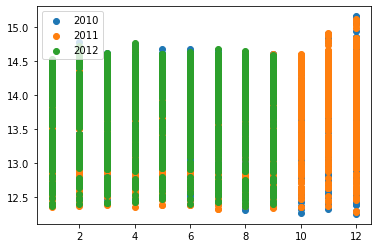

In [17]:
d2010=draw[draw['year']==2010]
d2011=draw[draw['year']==2011]
d2012=draw[draw['year']==2012]


plt.scatter(d2010['month'],d2010['Weekly_Sales'])
plt.scatter(d2011['month'],d2011['Weekly_Sales'])
plt.scatter(d2012['month'],d2012['Weekly_Sales'])
plt.legend(['2010','2011','2012'])
plt.show()

In [18]:
print(d2010[d2010['month']==10]['Weekly_Sales'])
print(sum(d2011['Weekly_Sales']))
print(sum(d2012['Weekly_Sales']))

34      14.189368
35      14.226455
36      14.193543
37      14.112243
38      14.140640
          ...    
6150    13.444460
6151    13.522190
6152    13.480407
6153    13.502032
6154    13.504711
Name: Weekly_Sales, Length: 225, dtype: float64
32054.998317941052
24040.863242990177


In [19]:
test

,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,year,month,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,3.617,4.214698,0.0,6.518784,18.928523,2.022584,6.573,0,2012,10,...,0,0,0,0,0,0,0,0,0,0
1,3.601,1.088480,0.0,2.901610,3.151902,3.305649,6.573,0,2012,10,...,0,0,0,0,0,0,0,0,0,0
2,3.594,0.495842,0.0,1.763864,0.419915,1.290059,6.573,0,2012,10,...,0,0,0,0,0,0,0,0,0,0
3,3.506,1.349186,317.5,2.146691,5.531683,0.727907,6.573,0,2012,10,...,0,0,0,0,0,0,0,0,0,0
4,3.617,3.150245,0.0,3.592129,15.840982,2.149345,6.170,0,2012,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3.755,0.020166,26.1,0.350626,0.000000,0.255318,5.217,0,2012,10,...,0,0,0,0,0,0,0,0,1,0
176,3.985,2.633173,0.0,6.733453,11.791272,1.305208,8.667,0,2012,10,...,0,0,0,0,0,0,0,0,0,1
177,4.000,1.020703,0.0,2.822898,3.135995,2.225839,8.667,0,2012,10,...,0,0,0,0,0,0,0,0,0,1
178,3.969,1.045612,0.0,1.137746,2.290461,0.857580,8.667,0,2012,10,...,0,0,0,0,0,0,0,0,0,1


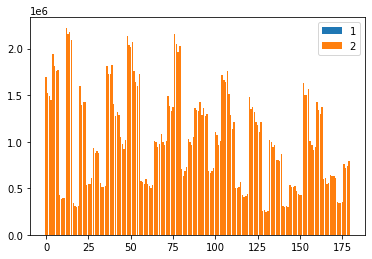

In [20]:


plt.bar(pred.index,pred['Weekly_Sales'])
plt.bar(lgbm_pred.index,pred['Weekly_Sales'])
plt.legend(['1','2'])
plt.show()

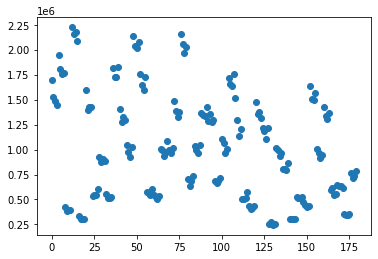

In [21]:
plt.scatter(pred_.index,pred['Weekly_Sales'])
#plt.legend(['1','2','3'])
plt.show()